In [1]:
import warnings
warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd

import io
import requests
import os, ssl

import matplotlib.pyplot as plt


dataset = pd.read_csv("adult.csv")

print(dataset.shape)

dataset.columns.values

(32561, 15)


array(['age', 'workclass', 'fnlwgt', 'education', 'education.num',
       'marital.status', 'occupation', 'relationship', 'race', 'sex',
       'capital.gain', 'capital.loss', 'hours.per.week', 'native.country',
       'income'], dtype=object)

In [2]:
dataset.sample(n=5, random_state=999)

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
27937,59,State-gov,139616,Masters,14,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,50,United-States,>50K
2043,51,Private,215404,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,Amer-Indian-Eskimo,Male,15024,0,40,United-States,>50K
2528,63,?,222289,Bachelors,13,Married-civ-spouse,?,Husband,White,Male,7688,0,54,United-States,>50K
574,44,Self-emp-not-inc,402397,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,1902,60,United-States,>50K
13929,37,Private,302604,Some-college,10,Separated,Other-service,Other-relative,White,Female,0,0,40,United-States,<=50K


In [3]:
dataset.describe(include='all')

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
count,32561.000000,32561,3.256100e+04,32561,32561.000000,32561,32561,32561,32561,32561,32561.000000,32561.000000,32561.000000,32561,32561
unique,NaN,9,NaN,16,NaN,7,15,6,5,2,NaN,NaN,NaN,42,2
top,NaN,Private,NaN,HS-grad,NaN,Married-civ-spouse,Prof-specialty,Husband,White,Male,NaN,NaN,NaN,United-States,<=50K
freq,NaN,22696,NaN,10501,NaN,14976,4140,13193,27816,21790,NaN,NaN,NaN,29170,24720
mean,38.581647,NaN,1.897784e+05,NaN,10.080679,NaN,NaN,NaN,NaN,NaN,1077.648844,87.303830,40.437456,NaN,NaN
std,13.640433,NaN,1.055500e+05,NaN,2.572720,NaN,NaN,NaN,NaN,NaN,7385.292085,402.960219,12.347429,NaN,NaN
min,17.000000,NaN,1.228500e+04,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,1.000000,NaN,NaN
25%,28.000000,NaN,1.178270e+05,NaN,9.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,40.000000,NaN,NaN
50%,37.000000,NaN,1.783560e+05,NaN,10.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,40.000000,NaN,NaN
75%,48.000000,NaN,2.370510e+05,NaN,12.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,45.000000,NaN,NaN


In [4]:
Data = dataset.drop(columns='income')
target = dataset['income']
target.value_counts()

<=50K    24720
>50K      7841
Name: income, dtype: int64

In [5]:
target = target.replace({'<=50K': 0, '>50K': 1})
target.value_counts()

0    24720
1     7841
Name: income, dtype: int64

In [6]:
categorical_cols = Data.columns[Data.dtypes==object].tolist()
print(categorical_cols)

['workclass', 'education', 'marital.status', 'occupation', 'relationship', 'race', 'sex', 'native.country']


In [7]:
for col in categorical_cols:
    n = len(Data[col].unique())
    if (n == 2):
        Data[col] = pd.get_dummies(Data[col], drop_first=True)
   
# use one-hot-encoding for categorical features with >2 levels
Data = pd.get_dummies(Data)

In [8]:
Data.columns

Index(['age', 'fnlwgt', 'education.num', 'sex', 'capital.gain', 'capital.loss',
       'hours.per.week', 'workclass_?', 'workclass_Federal-gov',
       'workclass_Local-gov',
       ...
       'native.country_Portugal', 'native.country_Puerto-Rico',
       'native.country_Scotland', 'native.country_South',
       'native.country_Taiwan', 'native.country_Thailand',
       'native.country_Trinadad&Tobago', 'native.country_United-States',
       'native.country_Vietnam', 'native.country_Yugoslavia'],
      dtype='object', length=107)

In [9]:
Data.sample(5, random_state=999)

,age,fnlwgt,education.num,sex,capital.gain,capital.loss,hours.per.week,workclass_?,workclass_Federal-gov,workclass_Local-gov,...,native.country_Portugal,native.country_Puerto-Rico,native.country_Scotland,native.country_South,native.country_Taiwan,native.country_Thailand,native.country_Trinadad&Tobago,native.country_United-States,native.country_Vietnam,native.country_Yugoslavia
27937,59,139616,14,1,0,0,50,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2043,51,215404,13,1,15024,0,40,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2528,63,222289,13,1,7688,0,54,1,0,0,...,0,0,0,0,0,0,0,1,0,0
574,44,402397,14,0,0,1902,60,0,0,0,...,0,0,0,0,0,0,0,1,0,0
13929,37,302604,10,0,0,0,40,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [10]:
from sklearn import preprocessing

Data_df = Data.copy()

Data_scaler = preprocessing.MinMaxScaler()
Data_scaler.fit(Data)
Data = Data_scaler.fit_transform(Data)

In [11]:
pd.DataFrame(Data, columns=Data_df.columns).sample(5, random_state=999)


,age,fnlwgt,education.num,sex,capital.gain,capital.loss,hours.per.week,workclass_?,workclass_Federal-gov,workclass_Local-gov,...,native.country_Portugal,native.country_Puerto-Rico,native.country_Scotland,native.country_South,native.country_Taiwan,native.country_Thailand,native.country_Trinadad&Tobago,native.country_United-States,native.country_Vietnam,native.country_Yugoslavia
27937,0.575342,0.086477,0.866667,1.0,0.000000,0.000000,0.500000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2043,0.465753,0.137949,0.800000,1.0,0.150242,0.000000,0.397959,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2528,0.630137,0.142625,0.800000,1.0,0.076881,0.000000,0.540816,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
574,0.369863,0.264946,0.866667,0.0,0.000000,0.436639,0.602041,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
13929,0.273973,0.197171,0.600000,0.0,0.000000,0.000000,0.397959,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


# Finding the important features

In [12]:
from sklearn.ensemble import RandomForestClassifier

num_features = 10
model_rfi = RandomForestClassifier(n_estimators=100)
model_rfi.fit(Data, target)
fs_indices_rfi = np.argsort(model_rfi.feature_importances_)[::-1][0:num_features]

best_features_rfi = Data_df.columns[fs_indices_rfi].values
best_features_rfi

array(['fnlwgt', 'age', 'capital.gain', 'hours.per.week',
       'marital.status_Married-civ-spouse', 'education.num',
       'relationship_Husband', 'capital.loss',
       'marital.status_Never-married', 'occupation_Exec-managerial'],
      dtype=object)

In [13]:
feature_importances_rfi = model_rfi.feature_importances_[fs_indices_rfi]
feature_importances_rfi

array([0.16260865, 0.1453478 , 0.10138959, 0.08161402, 0.07545784,
       0.0591629 , 0.04606396, 0.03001153, 0.02353013, 0.0178519 ])

In [14]:
%matplotlib inline 
%config InlineBackend.figure_format = 'retina'
plt.style.use("ggplot")

def plot_imp(best_features, scores, method_name):   
    plt.barh(best_features, scores)
    plt.title(method_name + ' Feature Importances')
    plt.xlabel("Importance")
    plt.ylabel("Features")
    plt.show()

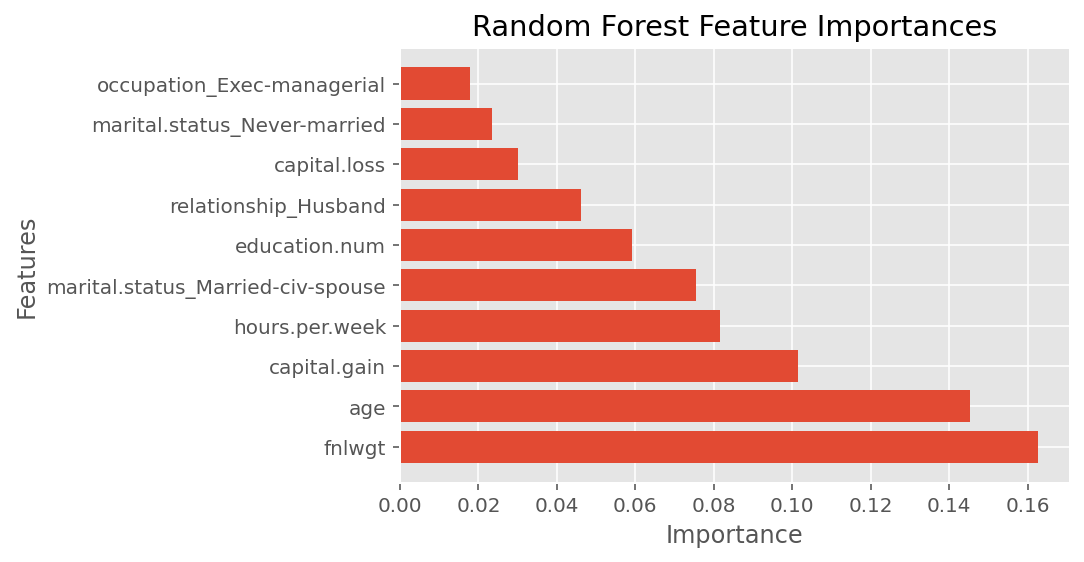

In [15]:
plot_imp(best_features_rfi, feature_importances_rfi, 'Random Forest')

# Splitting the data into train and test 

In [48]:
n_samples = 32000

Data_sample = pd.DataFrame(Data).sample(n=n_samples, random_state=8).values
target_sample = pd.DataFrame(target).sample(n=n_samples, random_state=8).values

print(Data_sample.shape)
print(target_sample.shape)

(32000, 107)
(32000, 1)


In [49]:
from sklearn.model_selection import train_test_split
Data_sample_train, Data_sample_test,target_sample_train, target_sample_test = train_test_split(Data_sample, target_sample, test_size = 0.3, random_state=999,stratify = target_sample)

print(Data_sample_train.shape)
print(Data_sample_test.shape)

(22400, 107)
(9600, 107)


# Training the models


# KNN model

In [18]:
from sklearn.model_selection import StratifiedKFold, GridSearchCV

cv_method = StratifiedKFold(n_splits=5, random_state=999)

In [19]:
from sklearn.base import BaseEstimator, TransformerMixin

# custom function for RFI feature selection inside a pipeline
# here we use n_estimators=100
class RFIFeatureSelector(BaseEstimator, TransformerMixin):
    
    # class constructor 
    # make sure class attributes end with a "_"
    # per scikit-learn convention to avoid errors
    def __init__(self, n_features_=10):
        self.n_features_ = n_features_
        self.fs_indices_ = None

    # override the fit function
    def fit(self, X, y):
        from sklearn.ensemble import RandomForestClassifier
        from numpy import argsort
        model_rfi = RandomForestClassifier(n_estimators=100)
        model_rfi.fit(X, y)
        self.fs_indices_ = argsort(model_rfi.feature_importances_)[::-1][0:self.n_features_] 
        return self 
    
    # override the transform function
    def transform(self, X, y=None):
        return X[:, self.fs_indices_]
    

In [20]:
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier

pipe_KNN = Pipeline(steps=[('rfi_fs', RFIFeatureSelector()), 
                           ('knn', KNeighborsClassifier())])

params_pipe_KNN = {'rfi_fs__n_features_': [10, 20, Data.shape[1]],
                   'knn__n_neighbors': [1, 5, 10, 15, 20],
                   'knn__p': [1, 2]}

gs_pipe_KNN = GridSearchCV(estimator=pipe_KNN, 
                           param_grid=params_pipe_KNN, 
                           cv=cv_method,
                           refit=True,
                           n_jobs=-2,
                           scoring='roc_auc',
                           verbose=1)

In [21]:
gs_pipe_KNN.fit(Data_sample_train, target_sample_train);

Fitting 5 folds for each of 30 candidates, totalling 150 fits


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 11 concurrent workers.
[Parallel(n_jobs=-2)]: Done  28 tasks      | elapsed:   45.8s
[Parallel(n_jobs=-2)]: Done 150 out of 150 | elapsed:  4.6min finished


In [22]:
gs_pipe_KNN.best_score_

0.8847856301649168

In [23]:
def get_search_results(gs):

    def model_result(scores, params):
        scores = {'mean_score': np.mean(scores),
             'std_score': np.std(scores),
             'min_score': np.min(scores),
             'max_score': np.max(scores)}
        return pd.Series({**params,**scores})

    models = []
    scores = []

    for i in range(gs.n_splits_):
        key = f"split{i}_test_score"
        r = gs.cv_results_[key]        
        scores.append(r.reshape(-1,1))

    all_scores = np.hstack(scores)
    for p, s in zip(gs.cv_results_['params'], all_scores):
        models.append((model_result(s, p)))

    pipe_results = pd.concat(models, axis=1).T.sort_values(['mean_score'], ascending=False)

    columns_first = ['mean_score', 'std_score', 'max_score', 'min_score']
    columns = columns_first + [c for c in pipe_results.columns if c not in columns_first]

    return pipe_results[columns]

In [24]:
results_KNN = get_search_results(gs_pipe_KNN)
results_KNN.head()

,mean_score,std_score,max_score,min_score,knn__n_neighbors,knn__p,rfi_fs__n_features_
24,0.884786,0.006458,0.893236,0.874759,20.0,1.0,10.0
27,0.884154,0.006492,0.891121,0.873097,20.0,2.0,10.0
21,0.881628,0.006001,0.886978,0.871294,15.0,2.0,10.0
18,0.881459,0.006180,0.887106,0.870494,15.0,1.0,10.0
28,0.876862,0.004872,0.882381,0.870509,20.0,2.0,20.0


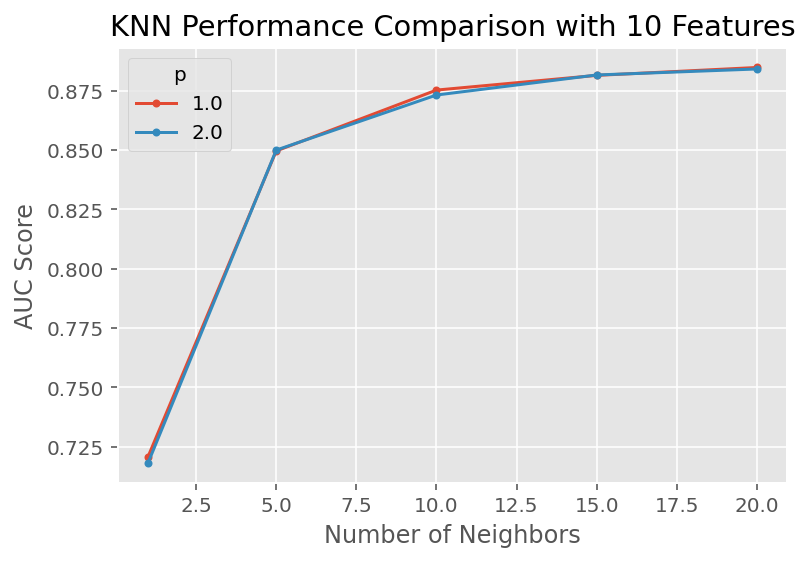

In [25]:
results_KNN_10_features = results_KNN[results_KNN['rfi_fs__n_features_'] == 10.0]

for i in results_KNN_10_features['knn__p'].unique():
    temp = results_KNN_10_features[results_KNN_10_features['knn__p'] == i]
    plt.plot(temp['knn__n_neighbors'], temp['mean_score'], marker = '.', label = i)
    
plt.legend(title = "p")
plt.xlabel('Number of Neighbors')
plt.ylabel("AUC Score")
plt.title("KNN Performance Comparison with 10 Features")
plt.show()

## Naive Bayes model

In [26]:
from sklearn.preprocessing import PowerTransformer
Data_sample_train_transformed = PowerTransformer().fit_transform(Data_sample_train)

In [27]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import RandomizedSearchCV

pipe_NB = Pipeline([('rfi_fs', RFIFeatureSelector()), 
                     ('nb', GaussianNB())])

params_pipe_NB = {'rfi_fs__n_features_': [10, 20, Data.shape[1]],
                  'nb__var_smoothing': np.logspace(1,-3, num=200)}

n_iter_search = 20
gs_pipe_NB = RandomizedSearchCV(estimator=pipe_NB, 
                          param_distributions=params_pipe_NB, 
                          cv=cv_method,
                          refit=True,
                          n_jobs=-2,
                          scoring='roc_auc',
                          n_iter=n_iter_search,
                          verbose=1) 

gs_pipe_NB.fit(Data_sample_train_transformed, target_sample_train);

Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 11 concurrent workers.
[Parallel(n_jobs=-2)]: Done  28 tasks      | elapsed:   39.8s
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:  2.0min finished


In [28]:
gs_pipe_NB.best_params_

{'rfi_fs__n_features_': 20, 'nb__var_smoothing': 3.448962260405758}

In [29]:
gs_pipe_NB.best_score_

0.8823350357770984

In [30]:
results_NB = get_search_results(gs_pipe_NB)
results_NB.head()

,mean_score,std_score,max_score,min_score,rfi_fs__n_features_,nb__var_smoothing
17,0.882335,0.004872,0.887395,0.874317,20.0,3.448962
13,0.880969,0.005685,0.886102,0.870093,20.0,2.273966
18,0.878390,0.005814,0.883162,0.867243,20.0,1.189534
10,0.877189,0.008753,0.885938,0.861568,10.0,2.273966
9,0.875503,0.010162,0.884786,0.856676,10.0,0.714943


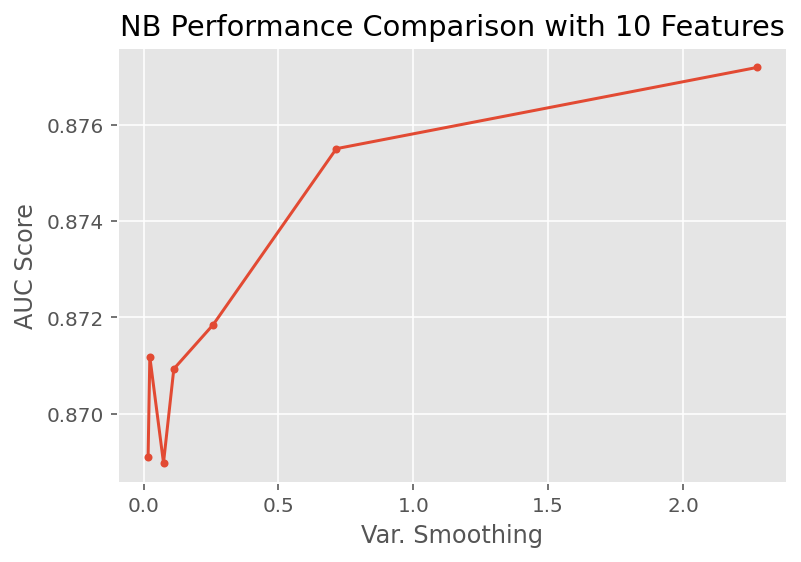

In [31]:
results_NB_10_features = results_NB[results_NB['rfi_fs__n_features_'] == 10.0].sort_values('nb__var_smoothing')

plt.plot(results_NB_10_features['nb__var_smoothing'], results_NB_10_features['mean_score'], marker = '.', label = i)    
plt.xlabel('Var. Smoothing')
plt.ylabel("AUC Score")
plt.title("NB Performance Comparison with 10 Features")
plt.show()

## DecisionTree model

In [32]:
from sklearn.tree import DecisionTreeClassifier

pipe_DT = Pipeline([('rfi_fs', RFIFeatureSelector()),
                    ('dt', DecisionTreeClassifier(criterion='gini', random_state=111))])

params_pipe_DT = {'rfi_fs__n_features_': [10, 20, Data.shape[1]],
                  'dt__max_depth': [3, 4, 5],
                  'dt__min_samples_split': [2, 5]}

gs_pipe_DT = GridSearchCV(estimator=pipe_DT, 
                          param_grid=params_pipe_DT, 
                          cv=cv_method,
                          refit=True,
                          n_jobs=-2,
                          scoring='roc_auc',
                          verbose=1) 

gs_pipe_DT.fit(Data_sample_train, target_sample_train);

Fitting 5 folds for each of 18 candidates, totalling 90 fits


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 11 concurrent workers.
[Parallel(n_jobs=-2)]: Done  28 tasks      | elapsed:   38.0s
[Parallel(n_jobs=-2)]: Done  90 out of  90 | elapsed:  1.8min finished


In [33]:
gs_pipe_DT.best_params_

{'dt__max_depth': 5, 'dt__min_samples_split': 2, 'rfi_fs__n_features_': 10}

In [34]:
gs_pipe_DT.best_score_

0.8839081801833364

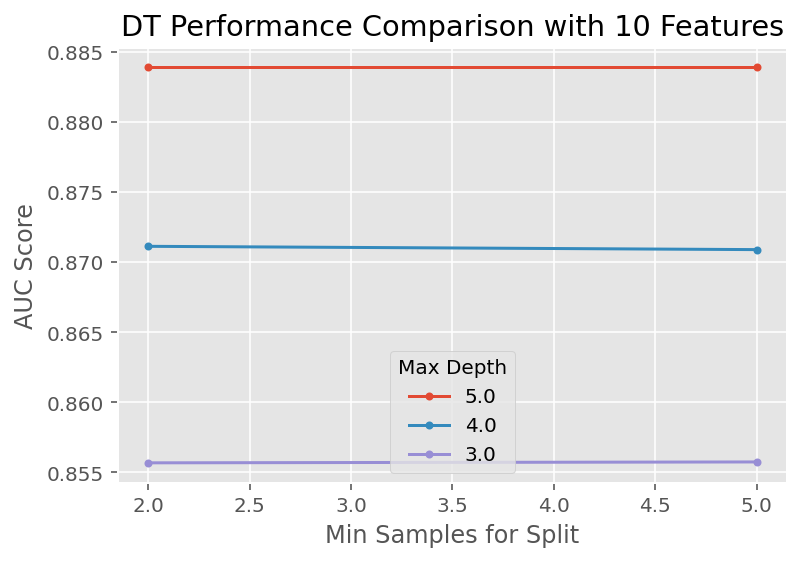

In [35]:
results_DT = get_search_results(gs_pipe_DT)
results_DT_10_features = results_DT[results_DT['rfi_fs__n_features_'] == 10.0]


for i in results_DT_10_features['dt__max_depth'].unique():
    temp = results_DT_10_features[results_DT_10_features['dt__max_depth'] == i]
    plt.plot(temp['dt__min_samples_split'], temp['mean_score'], marker = '.', label = i)
    
plt.legend(title = "Max Depth")
plt.xlabel('Min Samples for Split')
plt.ylabel("AUC Score")
plt.title("DT Performance Comparison with 10 Features")
plt.show()

In [36]:
params_pipe_DT2 = {'rfi_fs__n_features_': [10],
                  'dt__max_depth': [5, 10, 15],
                  'dt__min_samples_split': [5, 50, 100, 150]}

gs_pipe_DT2 = GridSearchCV(estimator=pipe_DT, 
                          param_grid=params_pipe_DT2, 
                          cv=cv_method,
                          refit=True,
                          n_jobs=-2,
                          scoring='roc_auc',
                          verbose=1) 

gs_pipe_DT2.fit(Data_sample_train, target_sample_train);

Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 11 concurrent workers.
[Parallel(n_jobs=-2)]: Done  28 tasks      | elapsed:   37.7s
[Parallel(n_jobs=-2)]: Done  60 out of  60 | elapsed:  1.2min finished


In [37]:
gs_pipe_DT2.best_params_

{'dt__max_depth': 10, 'dt__min_samples_split': 150, 'rfi_fs__n_features_': 10}

In [38]:
gs_pipe_DT2.best_score_

0.9005330239456072

In [39]:
results_DT = get_search_results(gs_pipe_DT2)
results_DT.head()

,mean_score,std_score,max_score,min_score,dt__max_depth,dt__min_samples_split,rfi_fs__n_features_
7,0.900533,0.004498,0.904716,0.892442,10.0,150.0,10.0
6,0.899695,0.004995,0.905398,0.890344,10.0,100.0,10.0
5,0.896503,0.004941,0.901202,0.887673,10.0,50.0,10.0
11,0.896275,0.005039,0.900208,0.886702,15.0,150.0,10.0
10,0.893456,0.005161,0.899319,0.883890,15.0,100.0,10.0


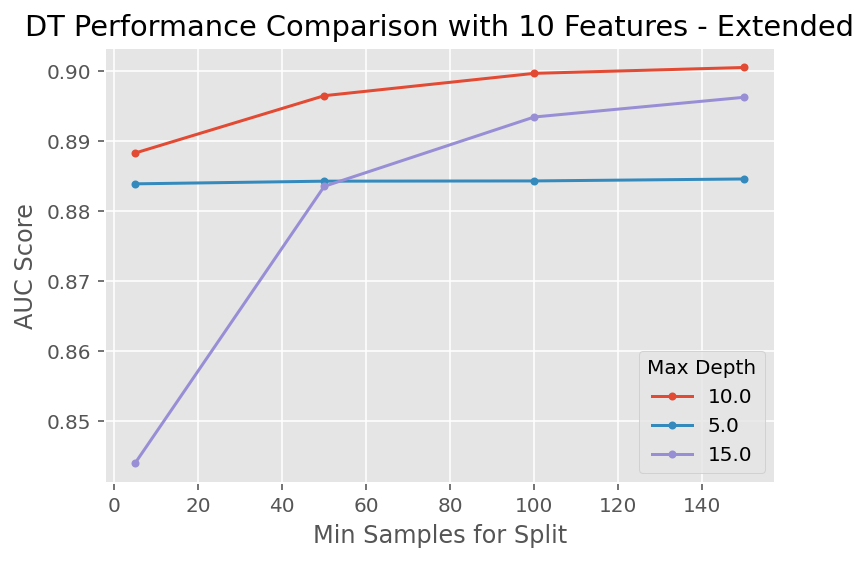

In [40]:
results_DT_10_features = results_DT[results_DT['rfi_fs__n_features_'] == 10.0].sort_values('dt__min_samples_split')


for i in results_DT_10_features['dt__max_depth'].unique():
    temp = results_DT_10_features[results_DT_10_features['dt__max_depth'] == i]
    plt.plot(temp['dt__min_samples_split'], temp['mean_score'], marker = '.', label = i)
    
plt.legend(title = "Max Depth")
plt.xlabel('Min Samples for Split')
plt.ylabel("AUC Score")
plt.title("DT Performance Comparison with 10 Features - Extended")
plt.show()

## Comparing the different models

In [41]:
from sklearn.model_selection import cross_val_score

cv_method_ttest = StratifiedKFold(n_splits=10, random_state=111)

cv_results_KNN = cross_val_score(estimator=gs_pipe_KNN.best_estimator_,
                                 X=Data_sample_test,
                                 y=target_sample_test, 
                                 cv=cv_method_ttest, 
                                 n_jobs=-2,
                                 scoring='roc_auc')
cv_results_KNN.mean()

0.8741202019811174

In [42]:
Data_sample_test_transformed = PowerTransformer().fit_transform(Data_sample_test)

cv_results_NB = cross_val_score(estimator=gs_pipe_NB.best_estimator_,
                                X=Data_sample_test_transformed,
                                y=target_sample_test, 
                                cv=cv_method_ttest, 
                                n_jobs=-2,
                                scoring='roc_auc')
cv_results_NB.mean()

0.8802255842748801

In [43]:
cv_results_DT = cross_val_score(estimator=gs_pipe_DT2.best_estimator_,
                                X=Data_sample_test,
                                y=target_sample_test, 
                                cv=cv_method_ttest, 
                                n_jobs=-2,
                                scoring='roc_auc')
cv_results_DT.mean()

0.8902100100603623

In [44]:
from scipy import stats

print(stats.ttest_rel(cv_results_KNN, cv_results_NB))
print(stats.ttest_rel(cv_results_DT, cv_results_KNN))
print(stats.ttest_rel(cv_results_DT, cv_results_NB))

Ttest_relResult(statistic=-2.7390302013682963, pvalue=0.02288385911443175)
Ttest_relResult(statistic=7.303270943602324, pvalue=4.5486700937465396e-05)
Ttest_relResult(statistic=3.0544619350687903, pvalue=0.013693713700505265)


In [45]:
pred_KNN = gs_pipe_KNN.predict(Data_sample_test)
Data_test_transformed = PowerTransformer().fit_transform(Data_sample_test)
pred_NB = gs_pipe_NB.predict(Data_test_transformed)
pred_DT = gs_pipe_DT2.predict(Data_sample_test)

In [46]:
from sklearn import metrics
print("\nClassification report for K-Nearest Neighbor") 
print(metrics.classification_report(target_sample_test, pred_KNN))
print("\nClassification report for Naive Bayes") 
print(metrics.classification_report(target_sample_test, pred_NB))
print("\nClassification report for Decision Tree") 
print(metrics.classification_report(target_sample_test, pred_DT))


Classification report for K-Nearest Neighbor
              precision    recall  f1-score   support

           0       0.86      0.93      0.89      5680
           1       0.71      0.52      0.60      1820

    accuracy                           0.83      7500
   macro avg       0.79      0.72      0.75      7500
weighted avg       0.82      0.83      0.82      7500


Classification report for Naive Bayes
              precision    recall  f1-score   support

           0       0.80      0.98      0.88      5680
           1       0.76      0.22      0.35      1820

    accuracy                           0.79      7500
   macro avg       0.78      0.60      0.61      7500
weighted avg       0.79      0.79      0.75      7500


Classification report for Decision Tree
              precision    recall  f1-score   support

           0       0.87      0.93      0.90      5680
           1       0.72      0.58      0.65      1820

    accuracy                           0.84      7500
  

In [47]:
from sklearn import metrics
print("\nConfusion matrix for K-Nearest Neighbor") 
print(metrics.confusion_matrix(target_sample_test, pred_KNN))
print("\nConfusion matrix for Naive Bayes") 
print(metrics.confusion_matrix(target_sample_test, pred_NB))
print("\nConfusion matrix for Decision Tree") 
print(metrics.confusion_matrix(target_sample_test, pred_DT))


Confusion matrix for K-Nearest Neighbor
[[5302  378]
 [ 881  939]]

Confusion matrix for Naive Bayes
[[5552  128]
 [1412  408]]

Confusion matrix for Decision Tree
[[5277  403]
 [ 760 1060]]
